In [3]:
import pandas as pd
import numpy as np
#data_path = "/sample_data/nf2.json"
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import sum, col, desc
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [4]:
#!pip install pyspark

In [5]:
spark  = SparkSession.builder.master("local").appName("Dataframes").getOrCreate()

In [6]:
df = spark.read.json("nf2.json", multiLine=False)

In [ ]:
df.show()

In [14]:
df_filtered = df.filter(df.cast.contains("John"))
df_filtered.select(df.cast).show(2, False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|cast                                                                                                                                                                        |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Logan Browning, Brandon P. Bell, DeRon Horton, Antoinette Robertson, John Patrick Amedori, Ashley Blaine Featherson, Marque Richardson, Giancarlo Esposito                  |
|Freida Pinto, Logan Marshall-Green, Robert John Burke, Megan Elisabeth Kelly, Sarah Minnich, Hayes Hargrove, Mark Sivertsen, Brandon Fierro, Antonio Valles, Clint Obenchain|
+----------------------------------------------------------------------------------------------------------------------------

Find the name of the actor

In [8]:
class Actor(object):
  def __init__(self):
    self.df_filtered = df.filter(df.cast.contains("John"))
    self.filt = self.df_filtered.groupBy("cast").count().orderBy(desc("count")).first()
  def MostAppearing(self):
    print(f"hte actor that appears most often is :{self.filt.cast}")

In [9]:
obj = Actor()
obj.MostAppearing()

hte actor that appears most often is :John Mulaney


The most popular genre is : Dramas, International Movies


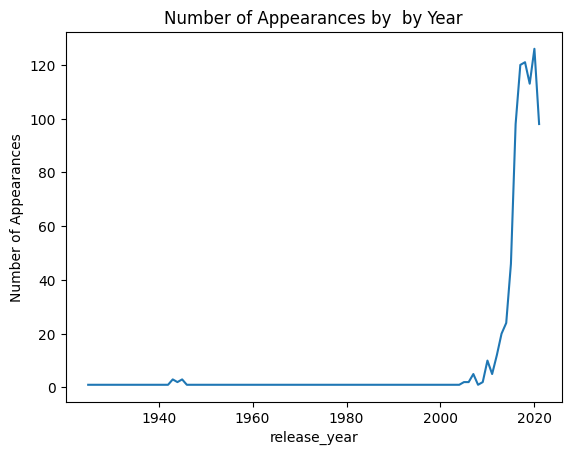

In [12]:
class Popular(object):

  def __init__(self):
    self.df_filtered = df.filter(df.type == "Movie")
    # # Find the most popular genre
    self.mostPopularGenre = df.groupBy("listed_in").count().orderBy(desc("count")).first()
    self.mostPopularActor = df.groupBy("cast").count().orderBy(desc("count")).first()
    self.appearancesByYear = df.filter(df.cast == self.mostPopularActor.cast).groupBy("release_year").count().orderBy("release_year")

  def Print(self):
    print(f"The most popular genre is : {self.mostPopularGenre.listed_in}")

  def Visualisation(self):
    # Plot the number of appearances by year
    plt.plot(self.appearancesByYear.select("release_year").collect(), self.appearancesByYear.select("count").collect())
    plt.xlabel("release_year")
    plt.ylabel("Number of Appearances")
    plt.title(f"Number of Appearances by {self.mostPopularActor.cast} by Year")
    plt.show()

p1 = Popular()
p1.Print()
p1.Visualisation()